In [1]:
# %%

# Step 1: Setup and imports
import time

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mlrose_hiive import DiscreteOpt, GARunner, MIMICRunner, OneMax, RHCRunner, SARunner


In [2]:
# %%

# Step 2: Define the OneMax problem
length = 50  # Length of the bit string
fitness = OneMax()
problem = DiscreteOpt(length=length, fitness_fn=fitness, maximize=True, max_val=2)



In [3]:
# %%

# Step 3: Randomized Hill Climbing Implementation
restart_list = [0, 5, 10, 20]
rhc_curves_list = []
rhc_times = []
for restarts in restart_list:
    start_time = time.time()
    rhc = RHCRunner(
        problem=problem,
        experiment_name="RHC",
        output_directory="./one_max",
        seed=42,
        iteration_list=[2**12],
        max_attempts=10,
        restart_list=[restarts],
    )
    _, rhc_curves = rhc.run()
    end_time = time.time()
    rhc_curves_list.append((restarts, rhc_curves))
    rhc_times.append(end_time - start_time)



In [4]:
# %%

# Step 4: Simulated Annealing Implementation
temperature_list = [10, 50, 100, 200]
sa_curves_list = []
sa_times = []
for temperature in temperature_list:
    start_time = time.time()
    sa = SARunner(
        problem=problem,
        experiment_name="SA",
        output_directory="./one_max",
        seed=42,
        iteration_list=[2**12],
        max_attempts=10,
        temperature_list=[temperature],
    )
    _, sa_curves = sa.run()
    end_time = time.time()
    sa_curves_list.append((temperature, sa_curves))
    sa_times.append(end_time - start_time)



In [5]:
# %%

# Step 5: Genetic Algorithm Implementation
population_sizes = [10, 100, 200, 500]
ga_curves_list = []
ga_times = []
for pop_size in population_sizes:
    start_time = time.time()
    ga = GARunner(
        problem=problem,
        experiment_name="GA",
        output_directory="./one_max",
        seed=42,
        iteration_list=[2**12],
        max_attempts=10,
        population_sizes=[pop_size],
        mutation_rates=[0.1],
    )
    _, ga_curves = ga.run()
    end_time = time.time()
    ga_curves_list.append((pop_size, ga_curves))
    ga_times.append(end_time - start_time)



In [6]:
# %%

# Step 6: MIMIC Implementation
keep_pct_list = [0.1, 0.3, 0.5, 0.7]
mimic_curves_list = []
mimic_times = []
for keep_pct in keep_pct_list:
    start_time = time.time()
    mimic = MIMICRunner(
        problem=problem,
        experiment_name="MIMIC",
        output_directory="./one_max",
        seed=42,
        iteration_list=[2**12],
        max_attempts=10,
        keep_percent_list=[keep_pct],
        population_sizes=[200],
    )
    _, mimic_curves = mimic.run()
    end_time = time.time()
    mimic_curves_list.append((keep_pct, mimic_curves))
    mimic_times.append(end_time - start_time)



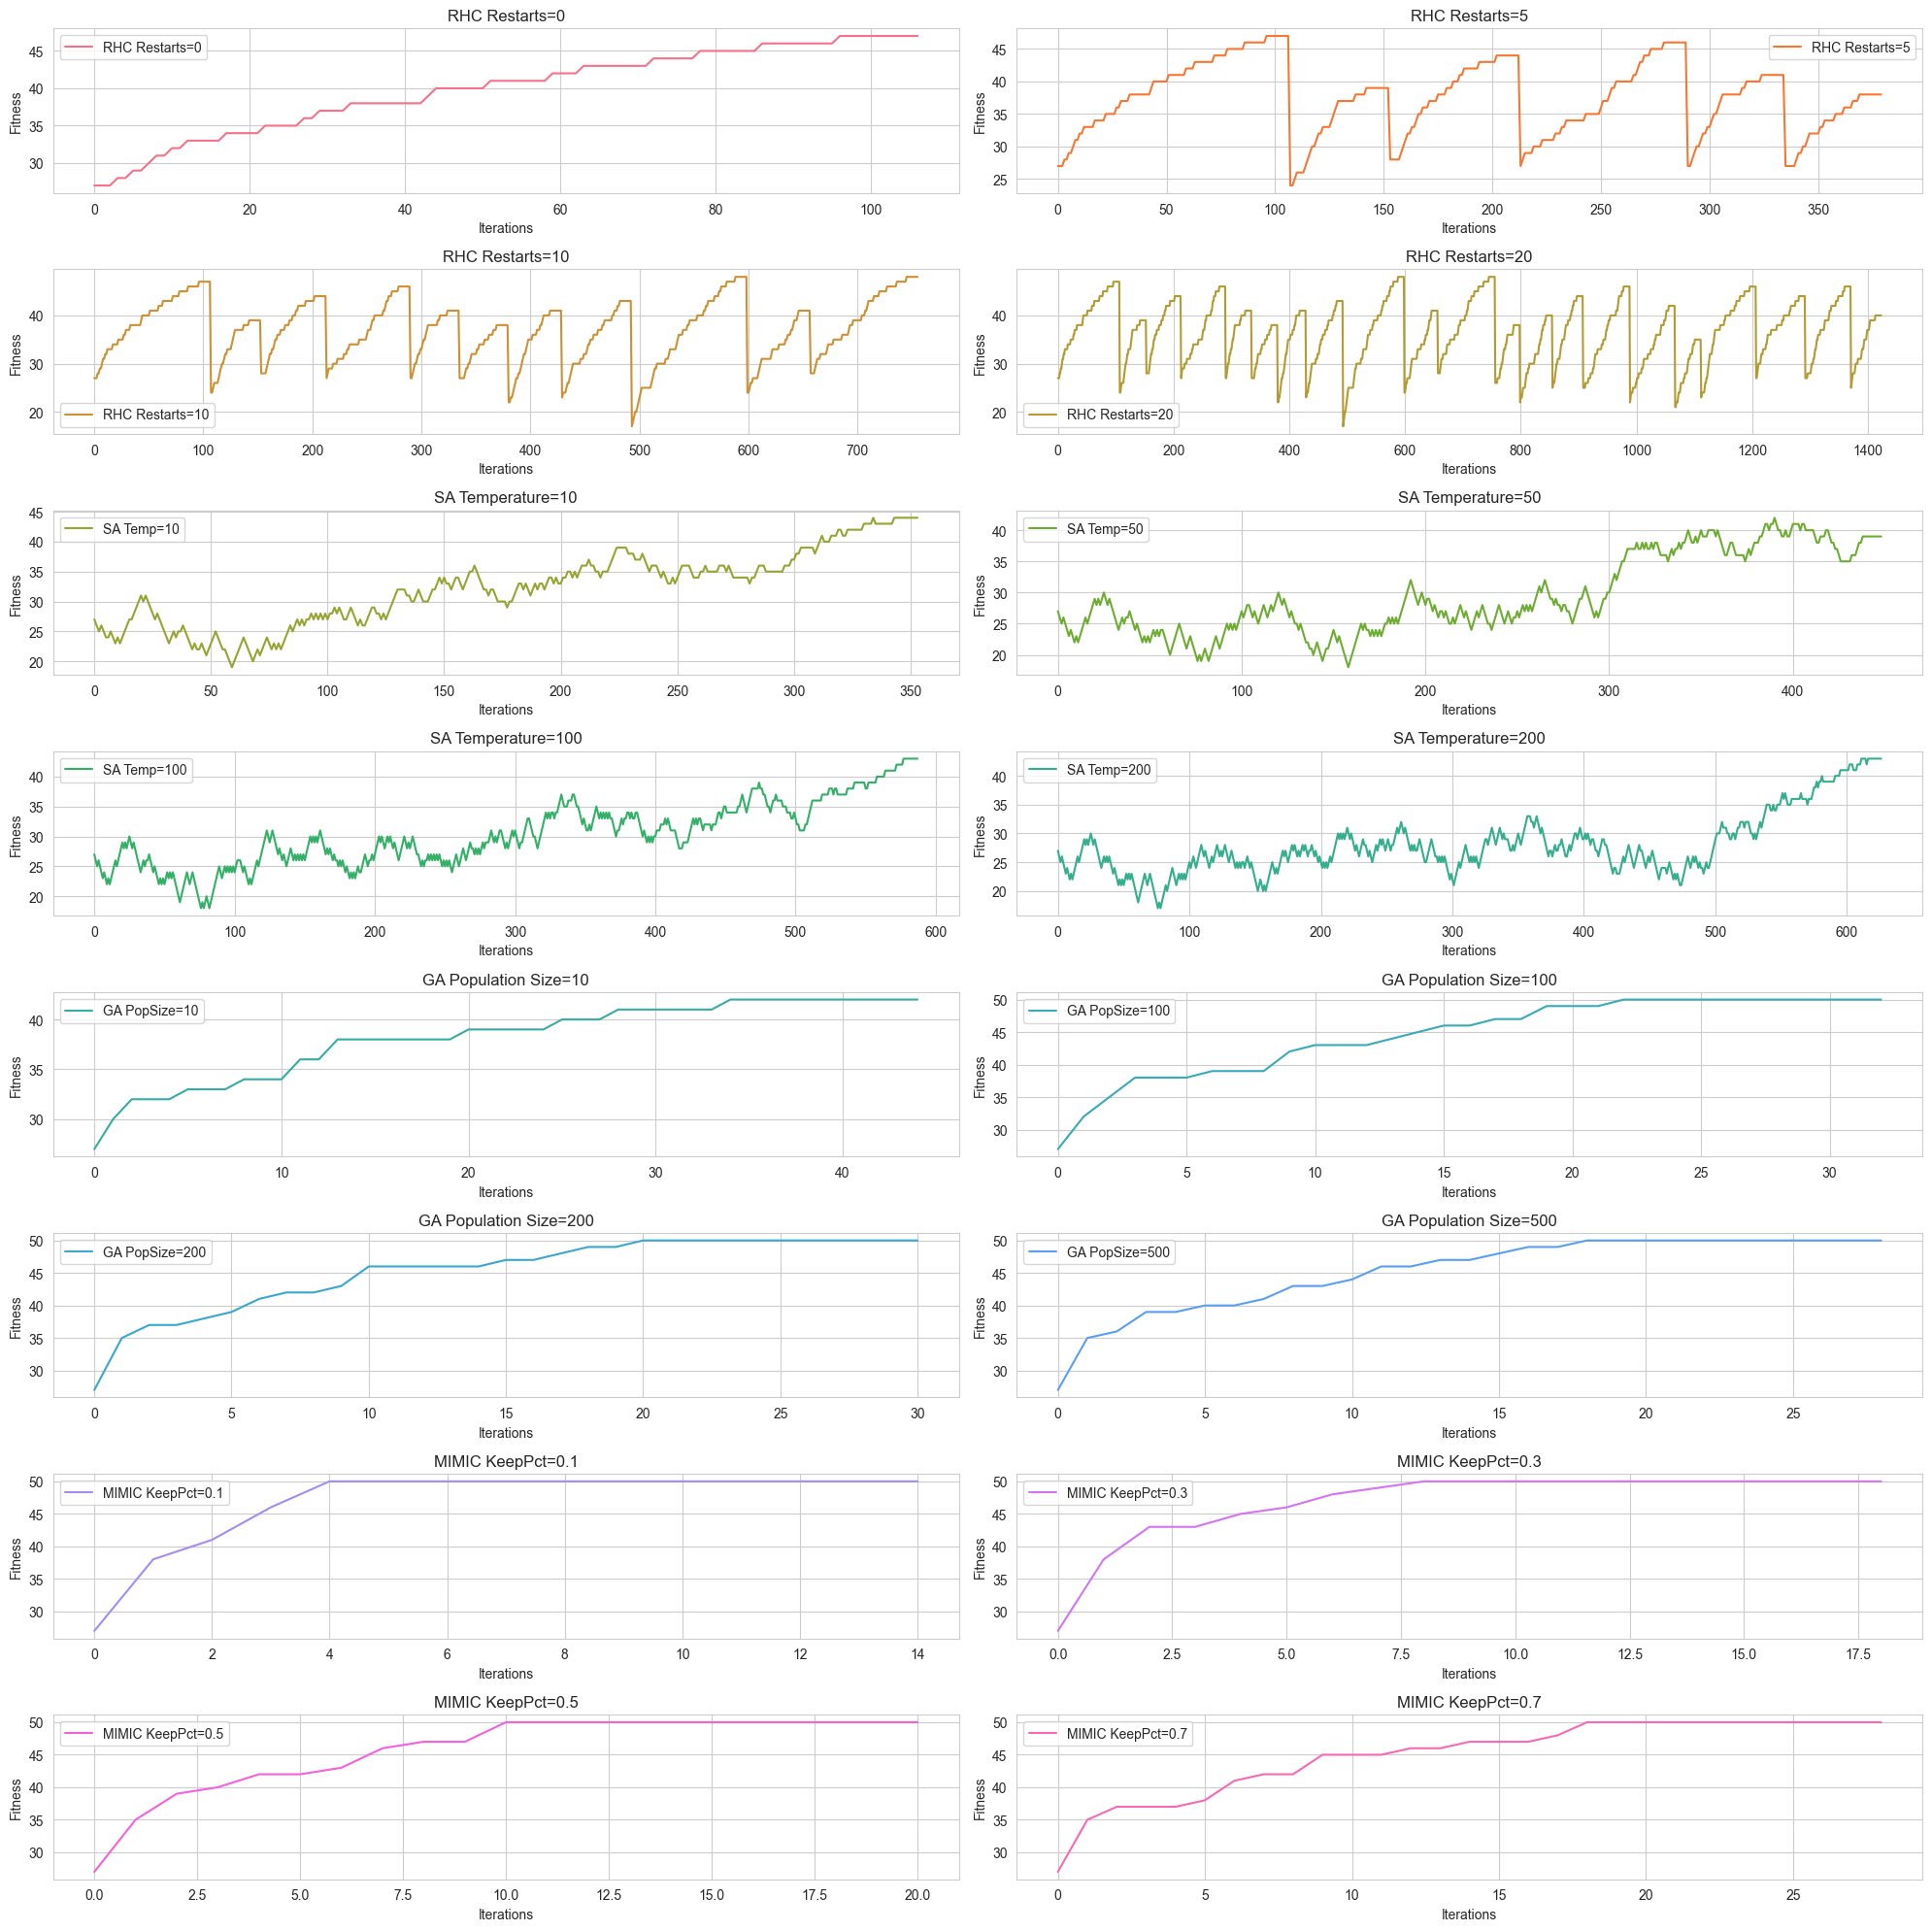

In [7]:
# %%

# Step 7: Visualization of Results
plt.figure(figsize=(20, 20))
sns.set_style("whitegrid")
colors = sns.color_palette(
    "husl", 16
)  # Using a colorful palette with 12 distinct colors

# Plot for RHC
for i, (restarts, rhc_curves) in enumerate(rhc_curves_list):
    plt.subplot(8, 2, i + 1)
    plt.plot(rhc_curves["Fitness"], label=f"RHC Restarts={restarts}", color=colors[i])
    plt.title(f"RHC Restarts={restarts}")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    plt.legend()

# Plot for SA
for i, (temperature, sa_curves) in enumerate(sa_curves_list):
    plt.subplot(8, 2, i + 5)
    plt.plot(
        sa_curves["Iteration"],
        sa_curves["Fitness"],
        label=f"SA Temp={temperature}",
        color=colors[i + 4],
    )
    plt.title(f"SA Temperature={temperature}")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    plt.legend()

# Plot for GA
for i, (pop_size, ga_curves) in enumerate(ga_curves_list):
    plt.subplot(8, 2, i + 9)
    plt.plot(
        ga_curves["Iteration"],
        ga_curves["Fitness"],
        label=f"GA PopSize={pop_size}",
        color=colors[i + 8],
    )
    plt.title(f"GA Population Size={pop_size}")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    plt.legend()

# Plot for MIMIC
for i, (keep_pct, mimic_curves) in enumerate(mimic_curves_list):
    plt.subplot(8, 2, i + 13)
    plt.plot(
        mimic_curves["Iteration"],
        mimic_curves["Fitness"],
        label=f"MIMIC KeepPct={keep_pct}",
        color=colors[i + 12],
    )
    plt.title(f"MIMIC KeepPct={keep_pct}")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    plt.legend()

plt.tight_layout()
plt.savefig("one_max.png")
plt.show()



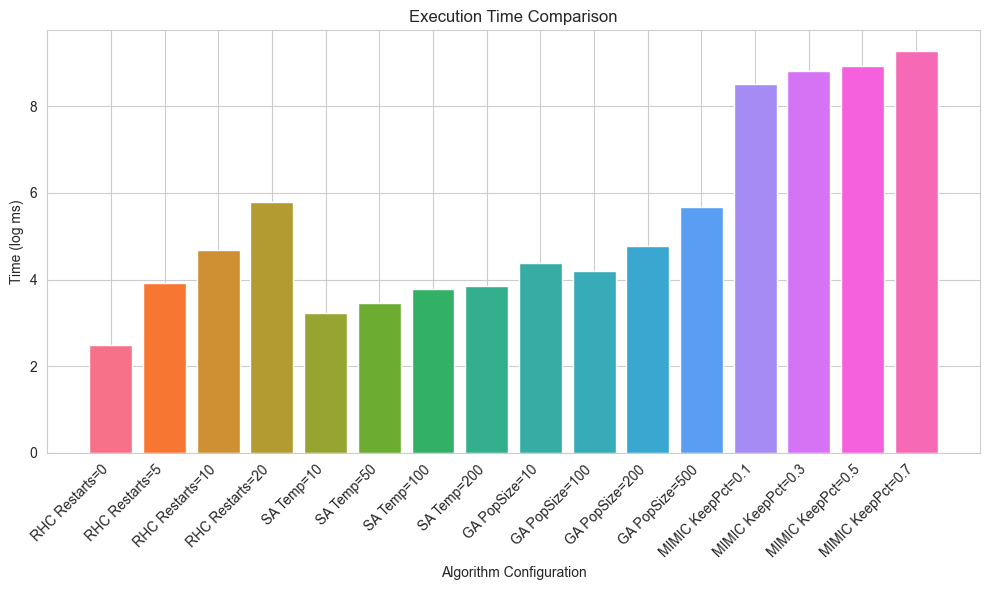

In [8]:
# %%

# Step 8: Visualization of Execution Times
labels = (
    [f"RHC Restarts={r}" for r in restart_list]
    + [f"SA Temp={t}" for t in temperature_list]
    + [f"GA PopSize={p}" for p in population_sizes]
    + [f"MIMIC KeepPct={k}" for k in keep_pct_list]
)
times = rhc_times + sa_times + ga_times + mimic_times

plt.figure(figsize=(10, 6))
plt.bar(labels, np.log(np.array(times) * 1000), color=colors)
plt.title("Execution Time Comparison")
plt.xlabel("Algorithm Configuration")
plt.ylabel("Time (log ms)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("one_max_times.png")
plt.show()


In [9]:
# %%
# Step 9: Test the impact of varying N on algorithm performance
N_values = [10, 20, 30, 40, 50]  # Different values of N to test
N_results = {}  # To store the results for different algorithms and N values

for N in N_values:
    # Define the OneMax problem for each N
    fitness = OneMax()
    problem = DiscreteOpt(length=N, fitness_fn=fitness, maximize=True, max_val=2)

    # Store results for each algorithm at this N
    results_at_N = {}

    # Randomized Hill Climbing for current N
    rhc = RHCRunner(
        problem=problem,
        experiment_name="RHC",
        output_directory=f"./one_max/N_{N}",
        seed=42,
        iteration_list=[2**12],
        max_attempts=10,
        restart_list=[1],
    )
    _, curves = rhc.run()
    results_at_N["RHC"] = curves["Fitness"].max()

    # Simulated Annealing for current N
    sa = SARunner(
        problem=problem,
        experiment_name="SA",
        output_directory=f"./one_max/N_{N}",
        seed=42,
        iteration_list=[2**12],
        max_attempts=10,
        temperature_list=[10],
    )
    _, curves = sa.run()
    results_at_N["SA"] = curves["Fitness"].max()

    # Genetic Algorithm for current N
    ga = GARunner(
        problem=problem,
        experiment_name="GA",
        output_directory=f"./one_max/N_{N}",
        seed=42,
        iteration_list=[2**12],
        max_attempts=10,
        population_sizes=[200],
        mutation_rates=[0.1],
    )
    _, curves = ga.run()
    results_at_N["GA"] = curves["Fitness"].max()

    # MIMIC for current N
    mimic = MIMICRunner(
        problem=problem,
        experiment_name="MIMIC",
        output_directory=f"./one_max/N_{N}",
        seed=42,
        iteration_list=[2**12],
        max_attempts=10,
        keep_percent_list=[0.1],
        population_sizes=[200],
    )
    _, curves = mimic.run()
    results_at_N["MIMIC"] = curves["Fitness"].max()

    N_results[N] = results_at_N


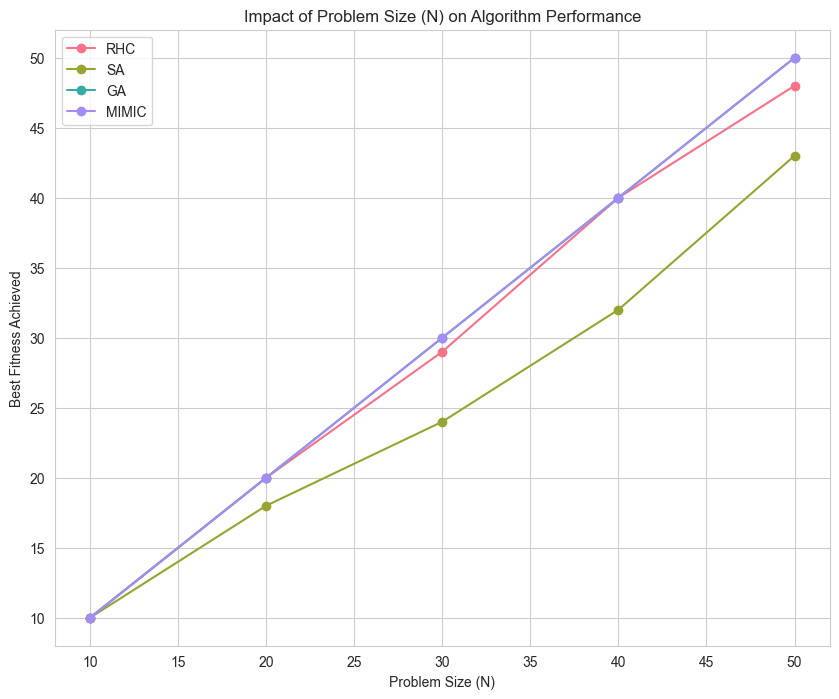

In [10]:
# %%
# Step 10: Visualization of N Impact on Algorithms
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Consistently use a specific color palette
colors = sns.color_palette("husl", 4)  # Use 4 distinct colors for the 4 algorithms

for idx, algo in enumerate(["RHC", "SA", "GA", "MIMIC"]):
    N_fitness = [N_results[N][algo] for N in N_values]
    plt.plot(N_values, N_fitness, marker="o", label=f"{algo}", color=colors[idx])

plt.title("Impact of Problem Size (N) on Algorithm Performance")
plt.xlabel("Problem Size (N)")
plt.ylabel("Best Fitness Achieved")
plt.legend()
plt.grid(True)
plt.savefig("one_max_performance_vs_N.png")
plt.show()

